In [1]:
# Intall any libraries and modules needed
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 38.0MB 558kB/s
     |████████████████████████████████| 81kB 3.9MB/s 
     |████████████████████████████████| 604kB 8.8MB/s 
     |████████████████████████████████| 3.1MB 9.7MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 81kB 10.2MB/s 
     |████████████████████████████████| 296kB 32.7MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.10.0-py2.py3-none-any.whl size=239950 sha256=94562a24e94f10ef03755adb3aac9028564458ea4ab416cf613a4f1bb7f717fd
  Stored in directory: /tmp/pip-ephem-wheel-cache-m2h0q94p/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=6bc9b45c10ce1926e611a42927d74ccdd6a8ba63e6fc313c07623454a87be049
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.0-cp36-none-any.whl size=599738 sha256=5c

In [2]:
# -*- coding: utf-8 -*-
"""=============================================================================

 Title          : ml_kaggleTitanic_2021_01_22.ipynb
 Description    : RMS Titanic Machine learning challenge 
 Author         : Luis F.P. Velasquez
 Date           : 2020_12_08
 Version        : 1.0
 Usage          : ml_kaggleTitanic_2021_01_22.ipynb
 Notes          : 
 python version : 

============================================================================="""

# =============================================================================
# Modules - Libraries
# =============================================================================

# DEA
%load_ext google.colab.data_table
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from pprint import pprint

# graphical presentation
import matplotlib.pyplot as plt
import seaborn as sns

# Data wrangling
import math

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV

# machine learning metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, balanced_accuracy_score

# =============================================================================
# Functions
# =============================================================================
def distrib_plot(plot_title, x_column, kde_value):
  # Distribution
  plot_dims = (12,6)
  dist_fig, axes = plt.subplots(1,2, constrained_layout=True, figsize=plot_dims)

  dist_fig.suptitle(plot_title)
  axes[0].set_title('Training')
  axes[1].set_title('Test')

  sns.histplot(data=dat_trn, x=x_column, ax = axes[0], stat='count', 
               kde=kde_value)
  sns.histplot(data=dat_tst, x=x_column, ax = axes[1], stat='count', 
               kde=kde_value)

def missingValues(dataset):
  # Create table with percentages of missing values
  # get total of null values
  attrib = ['Age', 'Cabin', 'Embarked', 'Fare']
  missingValues_total = dataset.isnull().sum().sort_values(ascending=False)
  percent = ((missingValues_total/dataset.shape[0])*100).round(3)
  # create dataframe
  missingData = pd.concat([missingValues_total,percent], axis=1, 
                          keys=['total_missing', '%'])
  # dataframe with percentages greater than zero
  df_missing = missingData.loc[(missingData.loc[:, missingData.dtypes != object] != 0).any(1)]
  return df_missing

def fillAge(x, dataset_dict):
  if math.isnan(x.Age):
      x.Age = dataset_dict[(x.Pclass, x.Sex)]
  return x

def familia(x):
  if x.Parch + x.SibSp > 0:
      x.flia = 1
  else:
      x.flia = 0
  return x

def get_cm(test_y, test_y_pred):
  cm = np.array(confusion_matrix(test_y, test_y_pred, labels=[1,0]))

  confusion_mat= pd.DataFrame(cm, index = ["Not-Survived", "Survived"],
                            columns =["Predicted Not Survived", "Predicted Survived"])

  # confusion_mat
  sns.heatmap(cm,annot=True,fmt='g',cmap='Set3')
  FP = confusion_mat.iloc[0]['Predicted Survived']
  TN = confusion_mat.iloc[1]['Predicted Survived']
  TP = confusion_mat.iloc[0]['Predicted Not Survived']
  FN = confusion_mat.iloc[1]['Predicted Not Survived']

  cm_metrics = pd.DataFrame(columns =["metric", "value"])
  variab_met = ['Accuracy', 'Misclassification', 'Sensitivity', 'Specificity', 'Pos Pred Value', 'Neg Pred Value']
  values_met = [((TP+TN)/(TP+TN+FP+FN)), ((FP+FN)/(TP+TN+FP+FN)), ((TP)/(TP+FN)), ((TN)/(TN+FP)), ((TP)/(TP+FP)), ((TN)/(FN+TN))]
  cm_metrics['metric'] = variab_met
  cm_metrics['value'] = values_met

  print('this is TP:{}'.format(TP))
  print('this is FP:{}'.format(FP))
  print('this is FN:{}'.format(FN))
  print('this is TN:{}'.format(TN))
  print(prt_sep)
  print(cm_metrics)
  print(prt_sep)
  print('Accuracy:{}'.format(accuracy_score(test_y, test_y_pred)))
  print('Precision:{}'.format(precision_score(test_y, test_y_pred)))
  print(prt_sep)
  print(classification_report(test_y, test_y_pred))

# =============================================================================
# Global variables
# =============================================================================
prt_sep = '-'*40
# loading data from GitHub
url_trn = 'https://raw.githubusercontent.com/GeoFelpave/LuisFPVelasquez_titanic/main/train.csv'
dat_trn = pd.read_csv(url_trn)
url_tst = 'https://raw.githubusercontent.com/GeoFelpave/LuisFPVelasquez_titanic/main/testdata_with_groundTruth.csv'
dat_tst = pd.read_csv(url_tst)


# **Data Undestanding**

## **Inspecting the records and attributes characteristics for traning and test data**

In [3]:
# number of records and attributes in each dataset
print('Total number of records in training data: {}'.format(dat_trn.shape[0]))
print('Total number of attributes in training data: {}'.format(dat_trn.shape[1]))
print(prt_sep)
print('Total number of records in test data: {}'.format(dat_tst.shape[0]))
print('Total number of attributes in test data: {}'.format(dat_tst.shape[1]))
print(prt_sep)
print('Attributes in training data: {}'.format(dat_trn.columns.values))
print('Attributes in test data: {}'.format(dat_tst.columns.values))

Total number of records in training data: 891
Total number of attributes in training data: 12
----------------------------------------
Total number of records in test data: 418
Total number of attributes in test data: 12
----------------------------------------
Attributes in training data: ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
Attributes in test data: ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### **Checking training and test data information**

As part of this section I am looking at the ***summary statistics*** as well as the ***graphical presentation*** of the data

In [4]:
# preview training data
print('TRAINING DATA')
dat_trn


TRAINING DATA


PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]

In [5]:
print('TEST DATA')
dat_tst


TEST DATA


PassengerId  Survived  Pclass  ...      Fare Cabin  Embarked
0            892         0       3  ...    7.8292   NaN         Q
1            893         1       3  ...    7.0000   NaN         S
2            894         0       2  ...    9.6875   NaN         Q
3            895         0       3  ...    8.6625   NaN         S
4            896         1       3  ...   12.2875   NaN         S
..           ...       ...     ...  ...       ...   ...       ...
413         1305         0       3  ...    8.0500   NaN         S
414         1306         1       1  ...  108.9000  C105         C
415         1307         0       3  ...    7.2500   NaN         S
416         1308         0       3  ...    8.0500   NaN         S
417         1309         1       3  ...   22.3583   NaN         C

[418 rows x 12 columns]

In [6]:
print('\nTraining data info below:\n')
dat_trn.info()

print(prt_sep)
print(prt_sep)
print(prt_sep)

print('\nTest data info below:\n')
dat_tst.info()


Training data info below:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
----------------------------------------
----------------------------------------

Test data info below:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 4

### **Summary Statistics**
- Numerical Data

In [7]:
print('TRAINING DATA')
dat_trn.describe().T


TRAINING DATA


count        mean         std  ...       50%    75%       max
PassengerId  891.0  446.000000  257.353842  ...  446.0000  668.5  891.0000
Survived     891.0    0.383838    0.486592  ...    0.0000    1.0    1.0000
Pclass       891.0    2.308642    0.836071  ...    3.0000    3.0    3.0000
Age          714.0   29.699118   14.526497  ...   28.0000   38.0   80.0000
SibSp        891.0    0.523008    1.102743  ...    0.0000    1.0    8.0000
Parch        891.0    0.381594    0.806057  ...    0.0000    0.0    6.0000
Fare         891.0   32.204208   49.693429  ...   14.4542   31.0  512.3292

[7 rows x 8 columns]

In [8]:
print('TEST DATA')
dat_tst.describe().round(3).T

TEST DATA


count      mean      std  ...       50%      75%       max
PassengerId  418.0  1100.500  120.810  ...  1100.500  1204.75  1309.000
Survived     418.0     0.378    0.485  ...     0.000     1.00     1.000
Pclass       418.0     2.266    0.842  ...     3.000     3.00     3.000
Age          332.0    30.273   14.181  ...    27.000    39.00    76.000
SibSp        418.0     0.447    0.897  ...     0.000     1.00     8.000
Parch        418.0     0.392    0.981  ...     0.000     0.00     9.000
Fare         417.0    35.627   55.908  ...    14.454    31.50   512.329

[7 rows x 8 columns]

- Categorical Data

In [9]:
print('TRAINING DATA')
dat_trn.describe(include=['O']).T

TRAINING DATA


count unique                             top freq
Name       891    891  Kirkland, Rev. Charles Leonard    1
Sex        891      2                            male  577
Ticket     891    681                            1601    7
Cabin      204    147                         B96 B98    4
Embarked   889      3                               S  644

In [10]:
print('TEST DATA')
dat_tst.describe(include=['O']).T

TEST DATA


count unique                              top freq
Name       418    418  Riordan, Miss. Johanna Hannah""    1
Sex        418      2                             male  266
Ticket     418    363                         PC 17608    5
Cabin       91     76                  B57 B59 B63 B66    3
Embarked   418      3                                S  270

- Create a comple report of the Exploratory Data Analysis

In [11]:
# using the train data
dat_trn.profile_report()

Output hidden; open in https://colab.research.google.com to view.

## From the data inspection:

* Training data:
  - There are 891 records (passengers) with 12 descriptive attributes, including the outcome feature (*Survived*)
  - *Name, Sex, Ticket, Cabin and Embarked* are categorical attributes
  - *PassengerId, Pclass, Age, SibSp, Parch and Fare* are numerical attributes
  - The attributes *Name, Cabin and PassengerId have a high variability, that is a high number of unique values for the first two and high SD for the last
  - *Age, Cabin and Embarked* attributes have NULL values.

* Test data
  - There are 418 records (passengers) with 12 descriptive attributes, including the outcome feature (*Survived*)
  - *Name, Sex, Ticket, Cabin and Embarked* are categorical attributes
  - *PassengerId, Pclass, Age, SibSp, Parch and Fare* are numerical attributes
  - The attributes *Name, Cabin and PassengerId have a high variability, that is a high number of unique values for the first two and high SD for the last
  - *Age, Fare and Cabin* attributes have NULL values.


---

### **Graphical Presentation of Data**

## Looking at the Data distribution for the *Training* and *Test* datasets

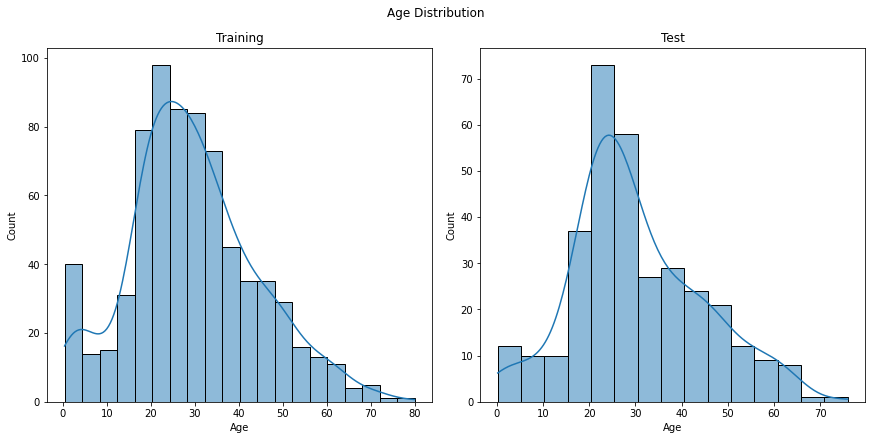

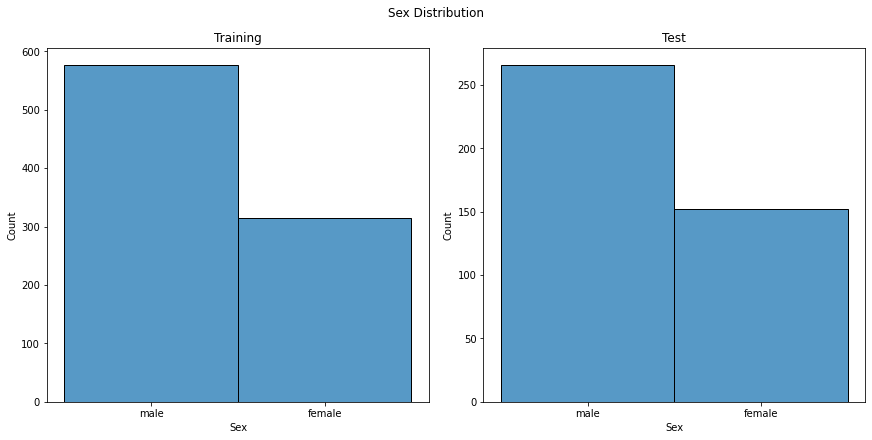

In [12]:
# Distribution Age
distrib_plot('Age Distribution', 'Age', True)

# Distribution Sex
distrib_plot('Sex Distribution', 'Sex', False)

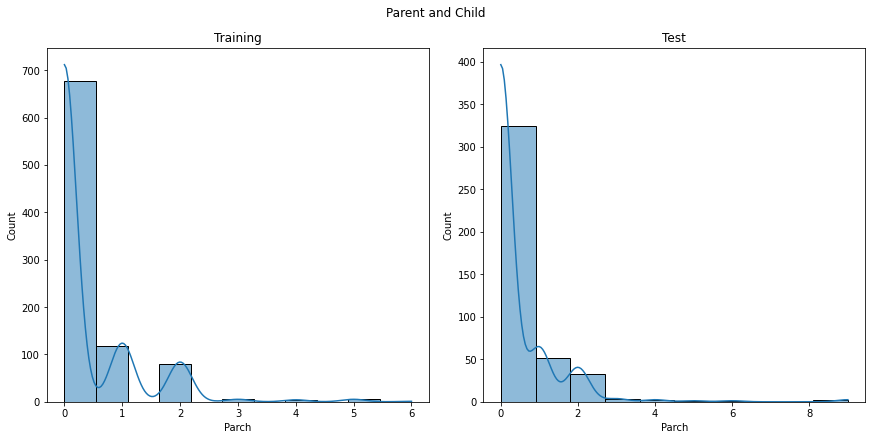

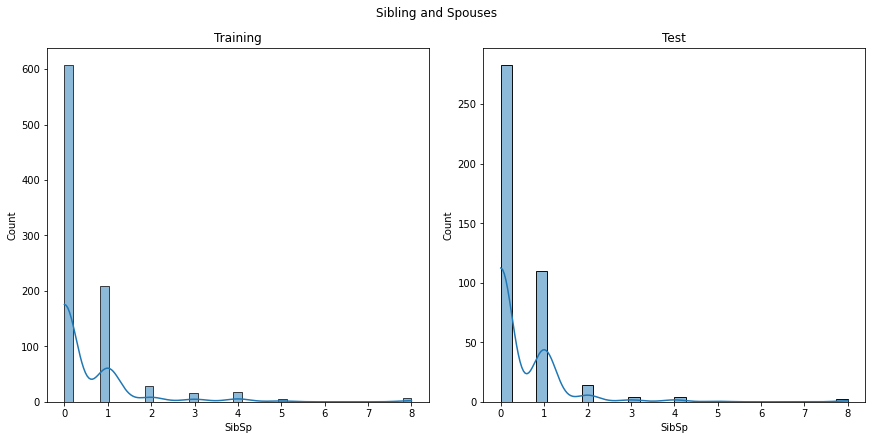

In [13]:
# Distribution Parent and Child
distrib_plot('Parent and Child', 'Parch', True)

# Distribution Siblings and Spouses
distrib_plot('Sibling and Spouses', 'SibSp', True)

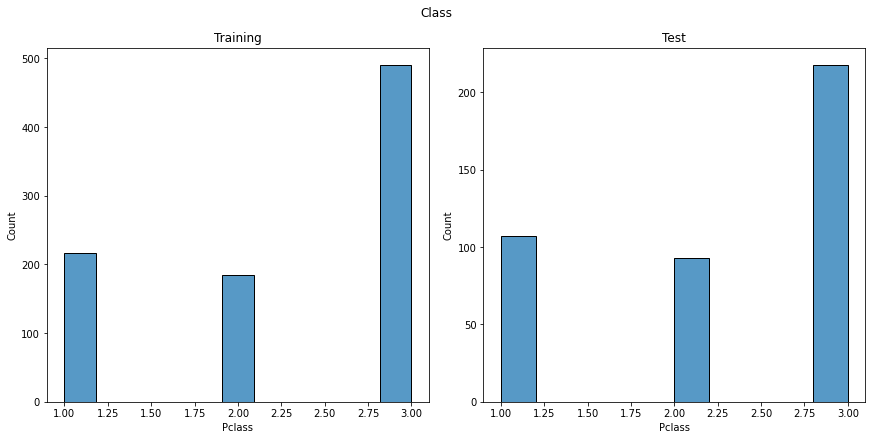

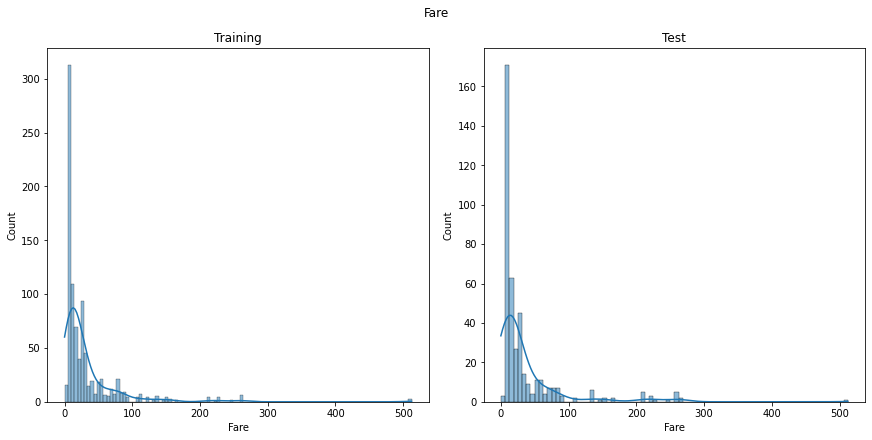

In [14]:
# Distribution Class
distrib_plot('Class', 'Pclass', False)

# Distribution Fare
distrib_plot('Fare', 'Fare', True)

## Looking at the attributes in the *Training* data in relation to the project's goal (Survived). 

- It is important to identify how do variables affect each other, thus understand which attributes can have a greater contribution/inference in the ML model.

- Look at the different attributes in relation to the *Survived* attributes

#### **Survived attribute**





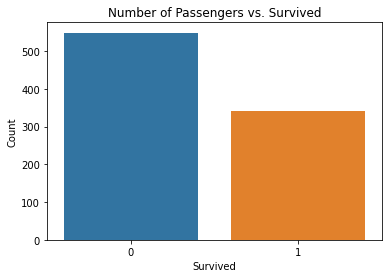

Number of passengers who survived and passed away:

0    549
1    342
Name: Survived, dtype: int64

Survival and death rate:

0    0.616
1    0.384
Name: Survived, dtype: float64


In [15]:
# Graphical output
axes = sns.countplot(x='Survived', data=dat_trn)
axes.set_title('Number of Passengers vs. Survived')
axes.set_xlabel('Survived')
axes.set_ylabel('Count')
plt.show()

# How many people survived
print('Number of passengers who survived and passed away:\n')
print(dat_trn['Survived'].value_counts())
# What is the survival rate
print('\nSurvival and death rate:\n')
print(dat_trn['Survived'].value_counts(normalize=True).round(3))




#### **Survived attribute in relation to other attributes**

- Survival by Sex

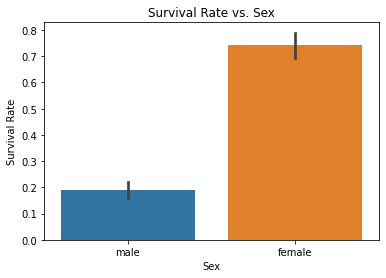

Sex  Survived
0  female     0.742
1    male     0.189

In [16]:
# Graphical output
axes = sns.barplot(x='Sex', y='Survived', data=dat_trn)
axes.set_title('Survival Rate vs. Sex')
axes.set_xlabel('Sex')
axes.set_ylabel('Survival Rate')
plt.show()

# Pivot table
dat_trn[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().round(3).sort_values(by='Survived', ascending=False)

- Survival by Class

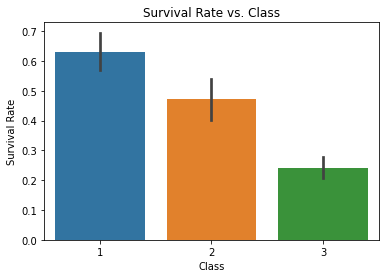

Pclass  Survived
0       1     0.630
1       2     0.473
2       3     0.242

In [17]:
# Graphical output
axes = sns.barplot(x='Pclass', y='Survived', data=dat_trn)
axes.set_title('Survival Rate vs. Class')
axes.set_xlabel('Class')
axes.set_ylabel('Survival Rate')
plt.show()

# Pivot table
dat_trn[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().round(3).sort_values(by='Survived', ascending=False)

- Survival by Sibling and Spouses

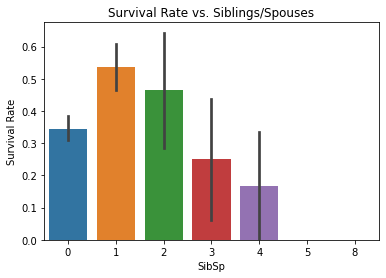

SibSp  Survived
1      1     0.536
2      2     0.464
0      0     0.345
3      3     0.250
4      4     0.167
5      5     0.000
6      8     0.000

In [18]:
# Graphical output
axes = sns.barplot(x="SibSp", y='Survived', data=dat_trn)
axes.set_title('Survival Rate vs. Siblings/Spouses')
axes.set_xlabel('SibSp')
axes.set_ylabel('Survival Rate')
plt.show()

# Pivot table
dat_trn[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().round(3).sort_values(by='Survived', ascending=False)

- Survival by Parent and Children

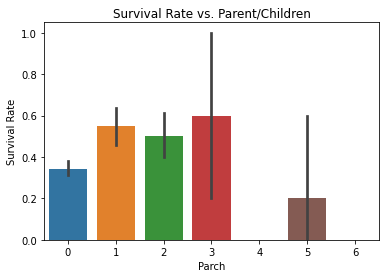

Parch  Survived
3      3     0.600
1      1     0.551
2      2     0.500
0      0     0.344
5      5     0.200
4      4     0.000
6      6     0.000

In [19]:
# Graphical output
axes = sns.barplot(x='Parch', y='Survived', data=dat_trn)
axes.set_title('Survival Rate vs. Parent/Children')
axes.set_xlabel('Parch')
axes.set_ylabel('Survival Rate')
plt.show()

# Pivot table
dat_trn[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().round(3).sort_values(by='Survived', ascending=False)

- Survival by Age

  From the age distribution plot, it is possible to see that to have a good plot of the survival rate by age, it is neccesary to group the different ages. The following grouping will be used: [0,1,10,18,30,60,100]

  - baby: (0,1]
  - children: (1:10]
  - young: (10:18]
  - adult: (18:30]
  - middle: (30:60]
  - senior: (60:100]

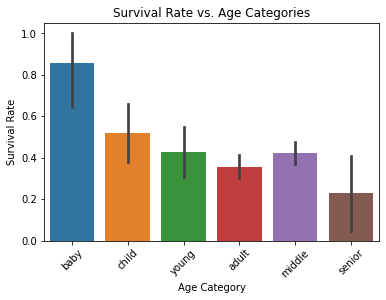

age_desc  Survived
0     baby     0.857
1    child     0.520
2    young     0.427
4   middle     0.420
3    adult     0.356
5   senior     0.227

In [20]:
# copy main dataframe to an age dataframe and add descriptive column 
df_age = dat_trn
age_break = [0,1,10,18,30,60,100]
# cut (check pandas cut method) the dataset using the age_bound - this is done over the original dataset
age_cat = pd.cut(dat_trn['Age'], age_break, labels=['baby','child','young','adult','middle','senior'])
# add the age descriptive column to age dataframe
df_age['age_desc'] = age_cat

# Graphical output
axes = sns.barplot(x="age_desc", y="Survived", data=df_age)
axes.set_title('Survival Rate vs. Age Categories')
axes.set_xlabel('Age Category')
axes.set_ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

# Pivot table
dat_trn[['age_desc', 'Survived']].groupby(['age_desc'], as_index=False).mean().round(3).sort_values(by='Survived', ascending=False)


In [21]:
# drop the age description column as it will not be used
dat_trn.drop(['age_desc'], axis=1, inplace=True)

- Survival by Embarkment / Class and Sex

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:648: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Sex  Pclass Embarked  Survived
1   female       1        Q     1.000
3   female       2        C     1.000
4   female       2        Q     1.000
0   female       1        C     0.977
2   female       1        S     0.958
5   female       2        S     0.910
7   female       3        Q     0.727
6   female       3        C     0.652
9     male       1        C     0.405
8   female       3        S     0.375
11    male       1        S     0.354
15    male       3        C     0.233
12    male       2        C     0.200
14    male       2        S     0.155
17    male       3        S     0.128
16    male       3        Q     0.077
10    male       1        Q     0.000
13    male       2        Q     0.000

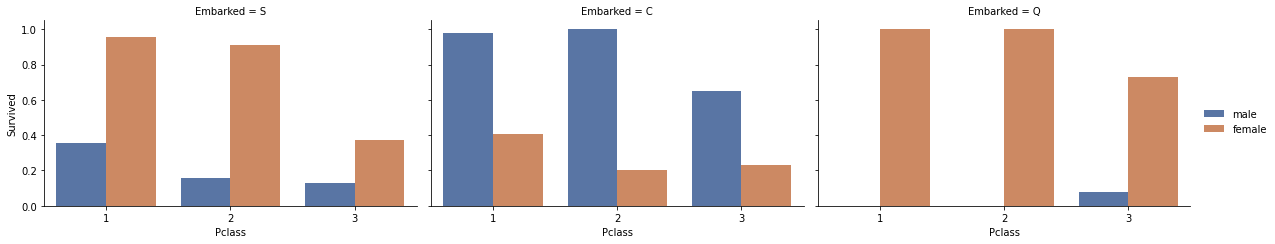

In [22]:
# Graphical output

grid = sns.FacetGrid(dat_trn, col='Embarked', height=3.5, aspect=1.6)
grid.map(sns.barplot, 'Pclass', 'Survived', 'Sex', ci = None, palette='deep')
grid.add_legend()

# Pivot table
dat_trn[['Sex', 'Pclass', 'Survived', 'Embarked']].groupby(['Sex', 'Pclass', 'Embarked'], as_index=False).mean().round(3).sort_values(by='Survived', ascending=False)

#### **Data Correlation**

This can be seen graphical using the matrix correlation. It is important to change any categorical variable to numerical

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


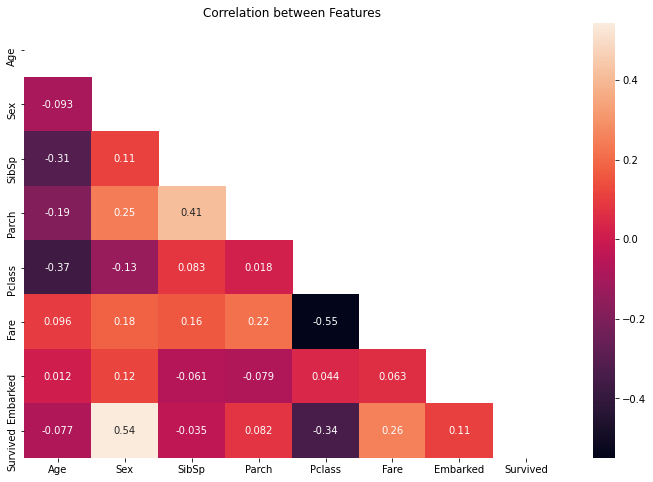

In [23]:
# Create subset of the main trainining dataset - avoids modifying the main dataset
train_subset = dat_trn[["Age","Sex","SibSp","Parch","Pclass","Fare","Embarked", "Survived"]]
train_subset['Sex'].replace(['male','female'],[0,1],inplace=True)
train_subset['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

# Create Matrix
matrix = np.triu(train_subset.corr())
plt.figure(figsize=(12,8))
plt.title('Correlation between Features')
sns.heatmap(train_subset.corr(), annot=True, mask=matrix)
plt.show()

---
# **Feature Engineering**

### **Dealing with missing values**



In [24]:
print ('Training dataset missing values:\n')
print(missingValues(dat_trn))
print ('\nTest dataset missing values:\n')
print(missingValues(dat_tst))


Training dataset missing values:

          total_missing       %
Cabin               687  77.104
Age                 177  19.865
Embarked              2   0.224

Test dataset missing values:

       total_missing       %
Cabin            327  78.230
Age               86  20.574
Fare               1   0.239


- ***Age Attribute***


> The graphical representation of the Age data, shows that the dataset is right skewed. Therefore, I will use the median to fill the missing values as the mean will give a biased result by using ages than are older than expected.

In order to fill Age values, I will group the data by Class & Sex and the Age median for each Class and Sex will be used to fill the values. (If I don't know the age of a female but I know the Class then I can determined the missing value)



In [25]:
# Create dictionary with format {(PClass, Sex): median}
train_dict = dict(dat_trn.groupby(['Pclass', 'Sex'])['Age'].median())
test_dict = dict(dat_tst.groupby(['Pclass', 'Sex'])['Age'].median())

# apply function to file null in main dataframe
dat_trn = dat_trn.apply(fillAge, dataset_dict=train_dict, axis=1)
dat_tst = dat_tst.apply(fillAge, dataset_dict=test_dict, axis=1)

# Check if age still has null values
print ('Training dataset missing values:\n')
print(missingValues(dat_trn))
print ('\nTest dataset missing values:\n')
print(missingValues(dat_tst))



Training dataset missing values:

          total_missing       %
Cabin               687  77.104
Embarked              2   0.224

Test dataset missing values:

       total_missing       %
Cabin            327  78.230
Fare               1   0.239


- ***Embarked Attribute***

Only the training dataset has missing value. I will use the value with the greatest cound in the main dataset to fill the Null

In [26]:
main_port = dat_trn['Embarked'].value_counts(ascending=False).head(1)
print('The port with the most people embarked in the training dataset is: ', main_port.to_string())


The port with the most people embarked in the training dataset is:  S    644


In [27]:
# filling Embarked with S
dat_trn['Embarked'].fillna("S", inplace=True)

# Check if Embarked still has null values
print ('Training dataset missing values:\n')
print(missingValues(dat_trn))

Training dataset missing values:

       total_missing       %
Cabin            687  77.104


- ***Fare Attribute***

Only the test dataset has missing value. I will use the median to fill the value.

In [28]:
dat_tst['Fare'].fillna(dat_tst['Fare'].median(), inplace=True)

# Check if age still has null values
print ('\nTest dataset missing values:\n')
print(missingValues(dat_tst))


Test dataset missing values:

       total_missing      %
Cabin            327  78.23


### **Dropping attributes that will not be used by the model**

- Cabin: Highly incomplete for training and test dataset. 77% and 78% respectively. It will also remove the remaining attribute with missing values
- Ticket: High number of unique values. It will be hard to categorised all values making harder for the model to learn using this variable
- PassengerId: This is not of use for the training model. All values are unique are there is not correlation with survival.


In [29]:
# Dropping from training
dat_trn.drop(['Cabin','Ticket', 'PassengerId'], axis=1, inplace=True)
# Dropping from test
dat_tst.drop(['Cabin','Ticket', 'PassengerId'], axis=1, inplace=True)

### **Encoding variables**

Convert categorical variable into dummy/indicator variables. For this I will use the get_dummies method in pandas for the following attributes:

- Pclass
- Sex
- Embarked



In [30]:
# Enconding training dataset
dat_trn = pd.get_dummies(dat_trn, columns=['Pclass', 'Sex', 'Embarked'])

# Encoding test dataset
dat_tst = pd.get_dummies(dat_tst, columns=['Pclass', 'Sex', 'Embarked'])

# Show the new attributes
print('Attributes in training data: {}'.format(dat_trn.columns.values))
print('Attributes in test data: {}'.format(dat_tst.columns.values))

Attributes in training data: ['Survived' 'Name' 'Age' 'SibSp' 'Parch' 'Fare' 'Pclass_1' 'Pclass_2'
 'Pclass_3' 'Sex_female' 'Sex_male' 'Embarked_C' 'Embarked_Q' 'Embarked_S']
Attributes in test data: ['Survived' 'Name' 'Age' 'SibSp' 'Parch' 'Fare' 'Pclass_1' 'Pclass_2'
 'Pclass_3' 'Sex_female' 'Sex_male' 'Embarked_C' 'Embarked_Q' 'Embarked_S']


I will delete the column Sex_male. By enconding the data I now have that for the attribute Sex_female if 1 = female and 0 = male

In [31]:
# dropping in training
dat_trn.drop(['Sex_male'], axis=1, inplace=True)
# dropping in test
dat_tst.drop(['Sex_male'], axis=1, inplace=True)

# Show the new attributes
print('Attributes in training data: {}'.format(dat_trn.columns.values))
print('Attributes in test data: {}'.format(dat_tst.columns.values))

Attributes in training data: ['Survived' 'Name' 'Age' 'SibSp' 'Parch' 'Fare' 'Pclass_1' 'Pclass_2'
 'Pclass_3' 'Sex_female' 'Embarked_C' 'Embarked_Q' 'Embarked_S']
Attributes in test data: ['Survived' 'Name' 'Age' 'SibSp' 'Parch' 'Fare' 'Pclass_1' 'Pclass_2'
 'Pclass_3' 'Sex_female' 'Embarked_C' 'Embarked_Q' 'Embarked_S']


- Encoding age

Taking into consideration the visual relation between the age categories and the survival rate. It will be good for the model to replace age values with ordinal values based in the age categories

In [32]:
print(' TRAINING DATASET\n')
# TRAINING
# copy main dataframe to an age dataframe and add descriptive column 
df_age = dat_trn
age_break = [0,1,10,18,30,60,100]
# cut (check pandas cut method) the dataset using the age_bound - this is done over the original dataset
age_cat = pd.cut(dat_trn['Age'], age_break, labels=['baby','child','young','adult','middle','senior'])
# add the age descriptive column to age dataframe
df_age['age_desc'] = age_cat

# encoding age_desc
dat_trn = pd.get_dummies(dat_trn, columns=['age_desc'])

# remove age and age_desc attributes
dat_trn.drop(['Age'], axis=1, inplace=True)

dat_trn


 TRAINING DATASET



Survived  ... age_desc_senior
0           0  ...               0
1           1  ...               0
2           1  ...               0
3           1  ...               0
4           0  ...               0
..        ...  ...             ...
886         0  ...               0
887         1  ...               0
888         0  ...               0
889         1  ...               0
890         0  ...               0

[891 rows x 18 columns]

In [33]:

print(' TEST DATASET\n')
# TRAINING
# copy main dataframe to an age dataframe and add descriptive column 
df_age = dat_tst
age_break = [0,1,10,18,30,60,100]
# cut (check pandas cut method) the dataset using the age_bound - this is done over the original dataset
age_cat = pd.cut(dat_tst['Age'], age_break, labels=['baby','child','young','adult','middle','senior'])
# add the age descriptive column to age dataframe
df_age['age_desc'] = age_cat

# encoding age_desc
dat_tst = pd.get_dummies(dat_tst, columns=['age_desc'])

# # remove age and age_desc attributes
dat_tst.drop(['Age'], axis=1, inplace=True)

dat_tst

 TEST DATASET



Survived  ... age_desc_senior
0           0  ...               0
1           1  ...               0
2           0  ...               1
3           0  ...               0
4           1  ...               0
..        ...  ...             ...
413         0  ...               0
414         1  ...               0
415         0  ...               0
416         0  ...               0
417         1  ...               0

[418 rows x 18 columns]

- Encoding SibSp and Parch

Taking into consideration that these two attributes described being in a familia. I will create a column that shows if the passenger is part of a family. Where 1 = is part of a family and 0 = alone

In [34]:
# training dataset
dat_trn['flia'] = 0
dat_trn = dat_trn.apply(familia, axis=1)

dat_trn

Survived  ... flia
0           0  ...    1
1           1  ...    1
2           1  ...    0
3           1  ...    1
4           0  ...    0
..        ...  ...  ...
886         0  ...    0
887         1  ...    0
888         0  ...    1
889         1  ...    0
890         0  ...    0

[891 rows x 19 columns]

In [35]:
# test dataset
dat_tst['flia'] = 0
dat_tst = dat_tst.apply(familia, axis=1)

dat_tst

Survived  ... flia
0           0  ...    0
1           1  ...    1
2           0  ...    0
3           0  ...    0
4           1  ...    1
..        ...  ...  ...
413         0  ...    0
414         1  ...    0
415         0  ...    0
416         0  ...    0
417         1  ...    1

[418 rows x 19 columns]

- Dropping redudant attributes

  - Name: The process is already using the Age and Sex attribute. Therefore the name does not have any further information that will enhance the model.
  - SibSp and Parch: The have already been combined into the flia attribute so they can be dropped
  - Fare: Does not offer information that can be used in the model.

In [36]:
# dropping in training
dat_trn.drop(['Name', 'SibSp', 'Parch', 'Fare'], axis=1, inplace=True)
# dropping in test
dat_tst.drop(['Name', 'SibSp', 'Parch', 'Fare'], axis=1, inplace=True)

In [37]:
# Final Training Dataset
dat_trn

Survived  Pclass_1  Pclass_2  ...  age_desc_middle  age_desc_senior  flia
0           0         0         0  ...                0                0     1
1           1         1         0  ...                1                0     1
2           1         0         0  ...                0                0     0
3           1         1         0  ...                1                0     1
4           0         0         0  ...                1                0     0
..        ...       ...       ...  ...              ...              ...   ...
886         0         0         1  ...                0                0     0
887         1         1         0  ...                0                0     0
888         0         0         0  ...                0                0     1
889         1         1         0  ...                0                0     0
890         0         0         0  ...                1                0     0

[891 rows x 15 columns]

In [38]:
# Final Test Dataset
dat_tst

Survived  Pclass_1  Pclass_2  ...  age_desc_middle  age_desc_senior  flia
0           0         0         0  ...                1                0     0
1           1         0         0  ...                1                0     1
2           0         0         1  ...                0                1     0
3           0         0         0  ...                0                0     0
4           1         0         0  ...                0                0     1
..        ...       ...       ...  ...              ...              ...   ...
413         0         0         0  ...                0                0     0
414         1         1         0  ...                1                0     0
415         0         0         0  ...                1                0     0
416         0         0         0  ...                0                0     0
417         1         0         0  ...                0                0     1

[418 rows x 15 columns]

---
# **Modelling**

- Separating variables (dependant and independant)

In [58]:
# variables for modesl without test split
# X_train = dat_trn.drop("Survived", axis=1)
# y_train = dat_trn["Survived"]
# X_test  = dat_tst.drop("Survived", axis=1).copy()
# X_train.shape, y_train.shape, X_test.shape


# variables for models using test split - Split variables
X = dat_trn.drop('Survived', axis=1)
y = dat_trn['Survived']
X.shape,y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state= 1)


862    1
223    0
84     1
680    0
535    1
      ..
796    1
815    0
629    0
421    0
448    1
Name: Survived, Length: 179, dtype: int64

- Running Models - Default configurations

Training accuracy:  0.8216292134831461
Testing accuracy:  0.7541899441340782
Scores: [0.75       0.81944444 0.78873239 0.84507042 0.83098592 0.81690141
 0.81690141 0.84507042 0.8028169  0.74647887]
Mean: 0.8062402190923319
Standard Deviation: 0.03328996260993837
----------------------------------------
this is TP:42
this is FP:31
this is FN:13
this is TN:93
----------------------------------------
              metric     value
0           Accuracy  0.754190
1  Misclassification  0.245810
2        Sensitivity  0.763636
3        Specificity  0.750000
4     Pos Pred Value  0.575342
5     Neg Pred Value  0.877358
----------------------------------------
Accuracy:0.7541899441340782
Precision:0.7636363636363637
----------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       106
           1       0.76      0.58      0.66        73

    accuracy                           0.75       179
   macro avg       0.76  

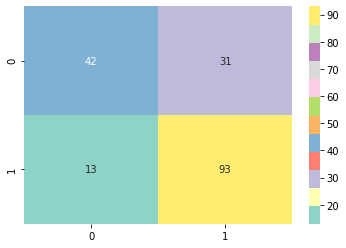

In [40]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred_tr = logreg.predict(X_train)
Y_pred_ts = logreg.predict(X_test)
print("Training accuracy: ", accuracy_score(y_train, Y_pred_tr))
print("Testing accuracy: ", accuracy_score(y_test, Y_pred_ts))

scores = cross_val_score(logreg, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

print(prt_sep)

# evaluate using confusion matrices - confusion_matrix(expected, predicted)
get_cm(y_test, Y_pred_ts)




Training accuracy:  0.8426966292134831
Testing accuracy:  0.770949720670391
----------------------------------------
this is TP:38
this is FP:35
this is FN:6
this is TN:100
----------------------------------------
              metric     value
0           Accuracy  0.770950
1  Misclassification  0.229050
2        Sensitivity  0.863636
3        Specificity  0.740741
4     Pos Pred Value  0.520548
5     Neg Pred Value  0.943396
----------------------------------------
Accuracy:0.770949720670391
Precision:0.8636363636363636
----------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       106
           1       0.86      0.52      0.65        73

    accuracy                           0.77       179
   macro avg       0.80      0.73      0.74       179
weighted avg       0.79      0.77      0.76       179

----------------------------------------
Scores: [0.79166667 0.84722222 0.8028169  0.85915493 0.81690141

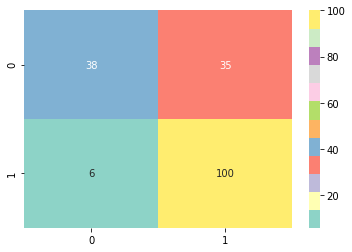

In [41]:
# # # Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)

Y_pred_tr = svc.predict(X_train)
Y_pred_ts = svc.predict(X_test)

print("Training accuracy: ", accuracy_score(y_train, Y_pred_tr))
print("Testing accuracy: ", accuracy_score(y_test, Y_pred_ts))

print(prt_sep)

# evaluate using confusion matrices - confusion_matrix(expected, predicted)
get_cm(y_test, Y_pred_ts)

# cross validation for svc
print(prt_sep)
scores = cross_val_score(svc, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


Training accuracy:  0.848314606741573
Testing accuracy:  0.7597765363128491
----------------------------------------
this is TP:38
this is FP:35
this is FN:8
this is TN:98
----------------------------------------
              metric     value
0           Accuracy  0.759777
1  Misclassification  0.240223
2        Sensitivity  0.826087
3        Specificity  0.736842
4     Pos Pred Value  0.520548
5     Neg Pred Value  0.924528
----------------------------------------
Accuracy:0.7597765363128491
Precision:0.8260869565217391
----------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       106
           1       0.83      0.52      0.64        73

    accuracy                           0.76       179
   macro avg       0.78      0.72      0.73       179
weighted avg       0.77      0.76      0.75       179

----------------------------------------
Scores: [0.76388889 0.77777778 0.74647887 0.84507042 0.83098592

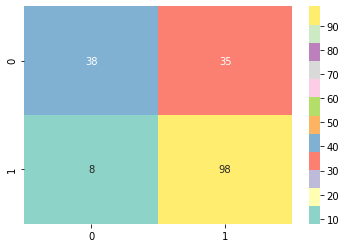

In [42]:

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

Y_pred_tr = random_forest.predict(X_train)
Y_pred_ts = random_forest.predict(X_test)
print("Training accuracy: ", accuracy_score(y_train, Y_pred_tr))
print("Testing accuracy: ", accuracy_score(y_test, Y_pred_ts))

# evaluate using confusion matrices - confusion_matrix(expected, predicted)
print(prt_sep)
get_cm(y_test, Y_pred_ts)

# # cross validation for random forest
print(prt_sep)
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())



Training accuracy:  0.8370786516853933
Testing accuracy:  0.7430167597765364
----------------------------------------
this is TP:39
this is FP:34
this is FN:12
this is TN:94
----------------------------------------
              metric     value
0           Accuracy  0.743017
1  Misclassification  0.256983
2        Sensitivity  0.764706
3        Specificity  0.734375
4     Pos Pred Value  0.534247
5     Neg Pred Value  0.886792
----------------------------------------
Accuracy:0.7430167597765364
Precision:0.7647058823529411
----------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       106
           1       0.76      0.53      0.63        73

    accuracy                           0.74       179
   macro avg       0.75      0.71      0.72       179
weighted avg       0.75      0.74      0.73       179

----------------------------------------
Scores: [0.72222222 0.77777778 0.76056338 0.81690141 0.830985

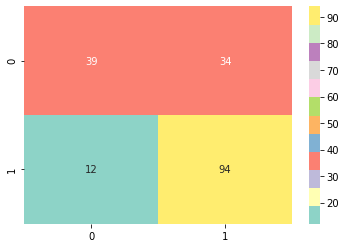

In [43]:
# Kneighbors Classifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

Y_pred_tr = knn.predict(X_train)
Y_pred_ts = knn.predict(X_test)
print("Training accuracy: ", accuracy_score(y_train, Y_pred_tr))
print("Testing accuracy: ", accuracy_score(y_test, Y_pred_ts))

# evaluate using confusion matrices - confusion_matrix(expected, predicted)
print(prt_sep)
get_cm(y_test, Y_pred_ts)

# cross validation for KNN
print(prt_sep)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


---

### **Parameter tunning**

- Parameter Tunning - Using Grid Search

In [44]:
# Grid Search - parameter tunning for Logistic Regression
from sklearn.model_selection import RepeatedStratifiedKFold
grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C': [100, 10, 1.0, 0.1, 0.01]}
logreg = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
clf = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
clf.fit(X_train, y_train)
clf.best_params_


{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

In [45]:
# Grid Search - parameter tunning for SVM
# from sklearn.model_selection import RepeatedStratifiedKFold
grid = {'kernel': ['poly', 'rbf', 'sigmoid'], 'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale']}
svc = SVC()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
clf = GridSearchCV(estimator=svc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
clf.fit(X_train, y_train)
clf.best_params_

{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}

In [61]:
# Grid Search - parameter tunning Random Forest
# finding best parameters
grid = {'criterion' : ['gini', 'entropy'], 'n_estimators': [100, 400, 700, 1000, 1500], 'max_features': ['sqrt', 'log2']}
# from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
clf = GridSearchCV(estimator=rf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# clf = GridSearchCV(estimator=rf, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
clf.fit(X_train, y_train)
clf.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 1000}

In [47]:
# Grid Search - parameter tunning KNN
# finding best parameters
grid = {'n_neighbors': range(1, 21, 2), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}
# from sklearn.model_selection import GridSearchCV, cross_val_score
knn = KNeighborsClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
clf = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
clf.fit(X_train, y_train)
clf.best_params_

{'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}

---

### **Predictions with optimised algorithms**

- Logistic Regression

Training accuracy:  0.8216292134831461
Testing accuracy:  0.7486033519553073
----------------------------------------
CV optimised model
Scores: [0.76388889 0.86111111 0.81690141 0.84507042 0.83098592 0.81690141
 0.83098592 0.84507042 0.81690141 0.73239437]
Mean: 0.8160211267605634
Standard Deviation: 0.0372588910969513
----------------------------------------
this is TP:42
this is FP:31
this is FN:14
this is TN:92
----------------------------------------
              metric     value
0           Accuracy  0.748603
1  Misclassification  0.251397
2        Sensitivity  0.750000
3        Specificity  0.747967
4     Pos Pred Value  0.575342
5     Neg Pred Value  0.867925
----------------------------------------
Accuracy:0.7486033519553073
Precision:0.75
----------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       106
           1       0.75      0.58      0.65        73

    accuracy                      

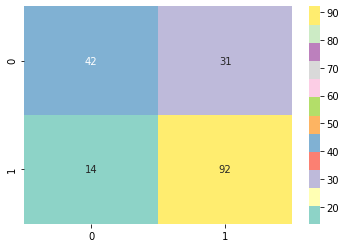

In [71]:
logreg_opt = LogisticRegression(solver = 'newton-cg', penalty = 'l2', C = 10)
logreg_opt.fit(X_train, y_train)
Y_pred_tr = logreg_opt.predict(X_train)
Y_pred_ts = logreg_opt.predict(X_test)
print("Training accuracy: ", accuracy_score(y_train, Y_pred_tr))
print("Testing accuracy: ", accuracy_score(y_test, Y_pred_ts))

print(prt_sep)
print('CV optimised model')
scores = cross_val_score(logreg_opt, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

print(prt_sep)

# evaluate using confusion matrices - confusion_matrix(expected, predicted)
get_cm(y_test, Y_pred_ts)

print(prt_sep)


----------------------------------------
CV model with test data
Scores: [0.80952381 0.69047619 0.69047619 0.76190476 0.80952381 0.69047619
 0.69047619 0.71428571 0.82926829 0.7804878 ]
Mean: 0.7466898954703833
Standard Deviation: 0.05457026435031215
----------------------------------------
this is TP:101
this is FP:57
this is FN:35
this is TN:225
----------------------------------------
              metric     value
0           Accuracy  0.779904
1  Misclassification  0.220096
2        Sensitivity  0.742647
3        Specificity  0.797872
4     Pos Pred Value  0.639241
5     Neg Pred Value  0.865385
----------------------------------------
Accuracy:0.7799043062200957
Precision:0.7426470588235294
----------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       260
           1       0.74      0.64      0.69       158

    accuracy                           0.78       418
   macro avg       0.77      0.75  

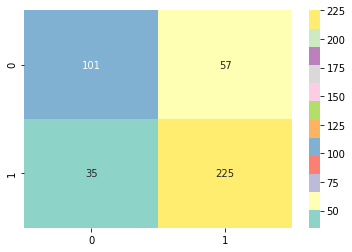

In [72]:

# Running optimised model with the test data

X_test_final = dat_tst.drop("Survived", axis=1)
Y_test_final = dat_tst["Survived"]

preds = logreg_opt.predict(X_test_final)

print(prt_sep)
print('CV model with test data')
scores = cross_val_score(logreg_opt, X_test_final, Y_test_final, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

print(prt_sep)

# evaluate using confusion matrices - confusion_matrix(expected, predicted)
get_cm(Y_test_final, preds)

- SVM

Training accuracy:  0.8426966292134831
Testing accuracy:  0.770949720670391
----------------------------------------
----------------------------------------
CV optimised model
Scores: [0.79166667 0.84722222 0.8028169  0.85915493 0.81690141 0.84507042
 0.88732394 0.83098592 0.84507042 0.78873239]
Mean: 0.8314945226917058
Standard Deviation: 0.029914000672064543
this is TP:38
this is FP:35
this is FN:6
this is TN:100
----------------------------------------
              metric     value
0           Accuracy  0.770950
1  Misclassification  0.229050
2        Sensitivity  0.863636
3        Specificity  0.740741
4     Pos Pred Value  0.520548
5     Neg Pred Value  0.943396
----------------------------------------
Accuracy:0.770949720670391
Precision:0.8636363636363636
----------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       106
           1       0.86      0.52      0.65        73

    accuracy        

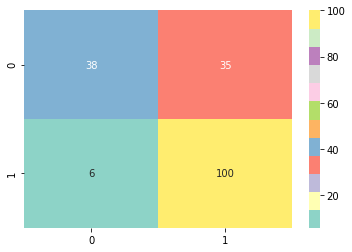

In [73]:
svc_opt = SVC(C = 1.0, gamma = 'scale', kernel = 'rbf')
svc_opt.fit(X_train, y_train)
Y_pred_tr = svc_opt.predict(X_train)
Y_pred_ts = svc_opt.predict(X_test)
print("Training accuracy: ", accuracy_score(y_train, Y_pred_tr))
print("Testing accuracy: ", accuracy_score(y_test, Y_pred_ts))

print(prt_sep)

# cross validation for svc
print(prt_sep)
print('CV optimised model')
scores = cross_val_score(svc_opt, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

# evaluate using confusion matrices - confusion_matrix(expected, predicted)
get_cm(y_test, Y_pred_ts)


----------------------------------------
CV model with test data
Scores: [0.78571429 0.69047619 0.71428571 0.76190476 0.83333333 0.76190476
 0.76190476 0.78571429 0.90243902 0.87804878]
Mean: 0.7875725900116144
Standard Deviation: 0.06344791577711445
----------------------------------------
this is TP:90
this is FP:68
this is FN:24
this is TN:236
----------------------------------------
              metric     value
0           Accuracy  0.779904
1  Misclassification  0.220096
2        Sensitivity  0.789474
3        Specificity  0.776316
4     Pos Pred Value  0.569620
5     Neg Pred Value  0.907692
----------------------------------------
Accuracy:0.7799043062200957
Precision:0.7894736842105263
----------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       260
           1       0.79      0.57      0.66       158

    accuracy                           0.78       418
   macro avg       0.78      0.74   

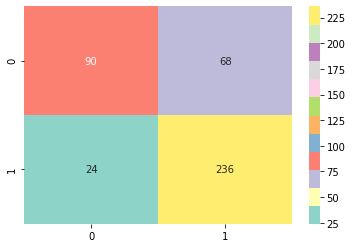

In [74]:

# Running optimised model with the test data

X_test_final = dat_tst.drop("Survived", axis=1)
Y_test_final = dat_tst["Survived"]

preds = svc_opt.predict(X_test_final)
print(prt_sep)
print('CV model with test data')

scores = cross_val_score(svc_opt, X_test_final, Y_test_final, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

print(prt_sep)
# evaluate using confusion matrices - confusion_matrix(expected, predicted)
get_cm(Y_test_final, preds)

- Running Random Forest with Best Parameters

Training accuracy:  0.848314606741573
Testing accuracy:  0.776536312849162
----------------------------------------
Scores: [0.76388889 0.80555556 0.77464789 0.85915493 0.83098592 0.8028169
 0.83098592 0.83098592 0.8028169  0.76056338]
Mean: 0.8062402190923319
Standard Deviation: 0.030885281655131047
----------------------------------------
this is TP:40
this is FP:33
this is FN:7
this is TN:99
----------------------------------------
              metric     value
0           Accuracy  0.776536
1  Misclassification  0.223464
2        Sensitivity  0.851064
3        Specificity  0.750000
4     Pos Pred Value  0.547945
5     Neg Pred Value  0.933962
----------------------------------------
Accuracy:0.776536312849162
Precision:0.851063829787234
----------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       106
           1       0.85      0.55      0.67        73

    accuracy                           0.78

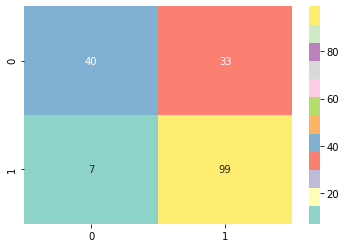

In [75]:
# Random Forest
random_forest_opt = RandomForestClassifier(criterion = 'gini', max_features = 'sqrt', n_estimators = 1000)
random_forest_opt.fit(X_train, y_train)

Y_pred_tr = random_forest_opt.predict(X_train)
Y_pred_ts = random_forest_opt.predict(X_test)
print("Training accuracy: ", accuracy_score(y_train, Y_pred_tr))
print("Testing accuracy: ", accuracy_score(y_test, Y_pred_ts))

print(prt_sep)

# # cross validation for random forest

scores = cross_val_score(random_forest_opt, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

# evaluate using confusion matrices - confusion_matrix(expected, predicted)
print(prt_sep)
get_cm(y_test, Y_pred_ts)


Scores: [0.80952381 0.69047619 0.76190476 0.76190476 0.85714286 0.69047619
 0.71428571 0.78571429 0.90243902 0.82926829]
Mean: 0.7803135888501742
Standard Deviation: 0.06728691726460488
----------------------------------------
this is TP:98
this is FP:60
this is FN:25
this is TN:235
----------------------------------------
              metric     value
0           Accuracy  0.796651
1  Misclassification  0.203349
2        Sensitivity  0.796748
3        Specificity  0.796610
4     Pos Pred Value  0.620253
5     Neg Pred Value  0.903846
----------------------------------------
Accuracy:0.7966507177033493
Precision:0.7967479674796748
----------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       260
           1       0.80      0.62      0.70       158

    accuracy                           0.80       418
   macro avg       0.80      0.76      0.77       418
weighted avg       0.80      0.80      0.79    

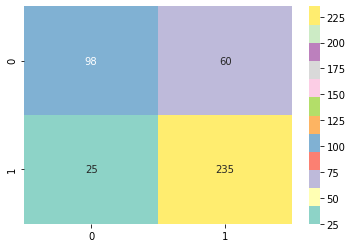

In [76]:
# Running optimised model with the test data

X_test_final = dat_tst.drop("Survived", axis=1)
Y_test_final = dat_tst["Survived"]

preds = random_forest_opt.predict(X_test_final)

scores = cross_val_score(random_forest_opt, X_test_final, Y_test_final, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

print(prt_sep)
# evaluate using confusion matrices - confusion_matrix(expected, predicted)
get_cm(Y_test_final, preds)

- KNN

Training accuracy:  0.8356741573033708
Testing accuracy:  0.770949720670391
----------------------------------------
----------------------------------------
Scores: [0.83333333 0.79166667 0.71830986 0.84507042 0.78873239 0.85915493
 0.88732394 0.81690141 0.83098592 0.77464789]
Mean: 0.814612676056338
Standard Deviation: 0.04570571582360066
----------------------------------------
this is TP:38
this is FP:35
this is FN:6
this is TN:100
----------------------------------------
              metric     value
0           Accuracy  0.770950
1  Misclassification  0.229050
2        Sensitivity  0.863636
3        Specificity  0.740741
4     Pos Pred Value  0.520548
5     Neg Pred Value  0.943396
----------------------------------------
Accuracy:0.770949720670391
Precision:0.8636363636363636
----------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       106
           1       0.86      0.52      0.65        73



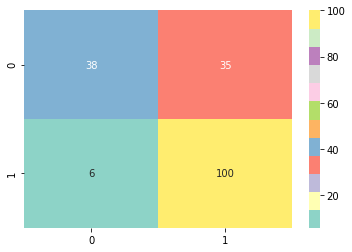

In [77]:
# Kneighbors Classifier
knn_opt = KNeighborsClassifier(n_neighbors = 13, metric = 'euclidean', weights = 'uniform')
knn_opt.fit(X_train, y_train)

Y_pred_tr = knn_opt.predict(X_train)
Y_pred_ts = knn_opt.predict(X_test)
print("Training accuracy: ", accuracy_score(y_train, Y_pred_tr))
print("Testing accuracy: ", accuracy_score(y_test, Y_pred_ts))

print(prt_sep)
# cross validation for KNN
print(prt_sep)
scores = cross_val_score(knn_opt, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

# evaluate using confusion matrices - confusion_matrix(expected, predicted)
print(prt_sep)
get_cm(y_test, Y_pred_ts)


Scores: [0.83333333 0.69047619 0.71428571 0.71428571 0.78571429 0.61904762
 0.61904762 0.71428571 0.82926829 0.85365854]
Mean: 0.7373403019744483
Standard Deviation: 0.08081614702897988
----------------------------------------
this is TP:91
this is FP:67
this is FN:30
this is TN:230
----------------------------------------
              metric     value
0           Accuracy  0.767943
1  Misclassification  0.232057
2        Sensitivity  0.752066
3        Specificity  0.774411
4     Pos Pred Value  0.575949
5     Neg Pred Value  0.884615
----------------------------------------
Accuracy:0.7679425837320574
Precision:0.7520661157024794
----------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.88      0.83       260
           1       0.75      0.58      0.65       158

    accuracy                           0.77       418
   macro avg       0.76      0.73      0.74       418
weighted avg       0.77      0.77      0.76    

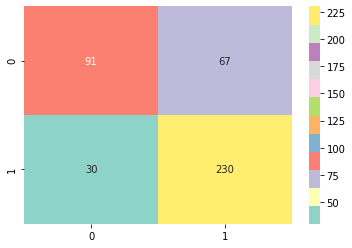

In [78]:

# Running optimised model with the test data

X_test_final = dat_tst.drop("Survived", axis=1)
Y_test_final = dat_tst["Survived"]

preds = knn_opt.predict(X_test_final)

scores = cross_val_score(knn_opt, X_test_final, Y_test_final, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

print(prt_sep)
# evaluate using confusion matrices - confusion_matrix(expected, predicted)
get_cm(Y_test_final, preds)